In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI.head()

Observations:  1640


,Open,High,Low,Close,Volume,Ticker
Time,,,,,,
2017-06-01,10590,10660,10530,10570,1888560,SSI
2017-06-02,10590,11040,10510,10950,5519180,SSI
2017-06-05,11000,11040,10740,10740,2811740,SSI
2017-06-06,10800,10910,10720,10870,2952940,SSI
2017-06-07,10950,11140,10930,10980,4110110,SSI


In [3]:
# Preprocessing
df = SSI['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1640)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,10740,2,1.0,0.0
3,2017-06-06,10870,3,2.0,1.0
4,2017-06-07,10980,4,3.0,2.0
5,2017-06-08,11060,5,4.0,3.0
6,2017-06-09,11140,6,5.0,4.0
...,...,...,...,...,...
1635,2023-12-11,32700,1635,1634.0,1633.0
1636,2023-12-12,32600,1636,1635.0,1634.0
1637,2023-12-13,32000,1637,1636.0,1635.0
1638,2023-12-14,32000,1638,1637.0,1636.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([18920.95181236, 18928.73498803, 18936.51816371, 18944.30133938,
       18952.08451506, 18959.86769073, 18967.65086641, 18975.43404208,
       18983.21721776, 18991.00039343, 18998.7835691 , 19006.56674478,
       19014.34992045, 19022.13309613, 19029.9162718 , 19037.69944748,
       19045.48262315, 19053.26579882, 19061.0489745 , 19068.83215017,
       19076.61532585, 19084.39850152, 19092.1816772 , 19099.96485287,
       19107.74802854, 19115.53120422, 19123.31437989, 19131.09755557,
       19138.88073124, 19146.66390692, 19154.44708259, 19162.23025827,
       19170.01343394, 19177.79660961, 19185.57978529, 19193.36296096,
       19201.14613664, 19208.92931231, 19216.71248799, 19224.49566366,
       19232.27883933, 19240.06201501, 19247.84519068, 19255.62836636,
       19263.41154203, 19271.19471771, 19278.97789338, 19286.76106906,
       19294.54424473, 19302.3274204 , 19310.11059608, 19317.89377175,
       19325.67694743, 19333.4601231 , 19341.24329878, 19349.02647445,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[19769.31796087 19777.10113654 19784.88431221 19792.66748789
 19800.45066356 19808.23383924 19816.01701491 19823.80019059
 19831.58336626 19839.36654193 19847.14971761 19854.93289328
 19862.71606896 19870.49924463 19878.28242031 19886.06559598
 19893.84877165 19901.63194733 19909.415123   19917.19829868
 19766.72356897 19774.50674465 19782.28992032 19790.073096
 19797.85627167 19805.63944735 19813.42262302 19821.20579869
 19828.98897437 19836.77215004 19844.55532572 19852.33850139
 19860.12167707 19867.90485274 19875.68802841 19883.47120409
 19891.25437976 19899.03755544 19906.82073111 19914.60390679
 19764.12917708 19771.91235276 19779.69552843 19787.47870411
 19795.26187978 19803.04505545 19810.82823113 19818.6114068
 19826.39458248 19834.17775815 19841.96093383 19849.7441095
 19857.52728517 19865.31046085 19873.09363652 19880.8768122
 19888.65998787 19896.44316355 19904.22633922 19912.00951489]


In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 7430.082137602955
Testing MAPE: 20.608102198417463
Testing MAE: 5553.477435290091
MSLR:  0.09345978609706528


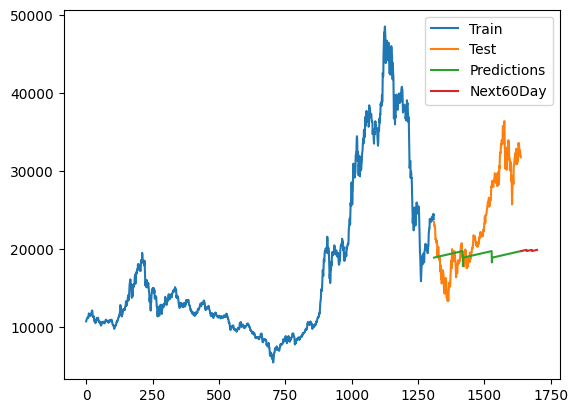

In [10]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()